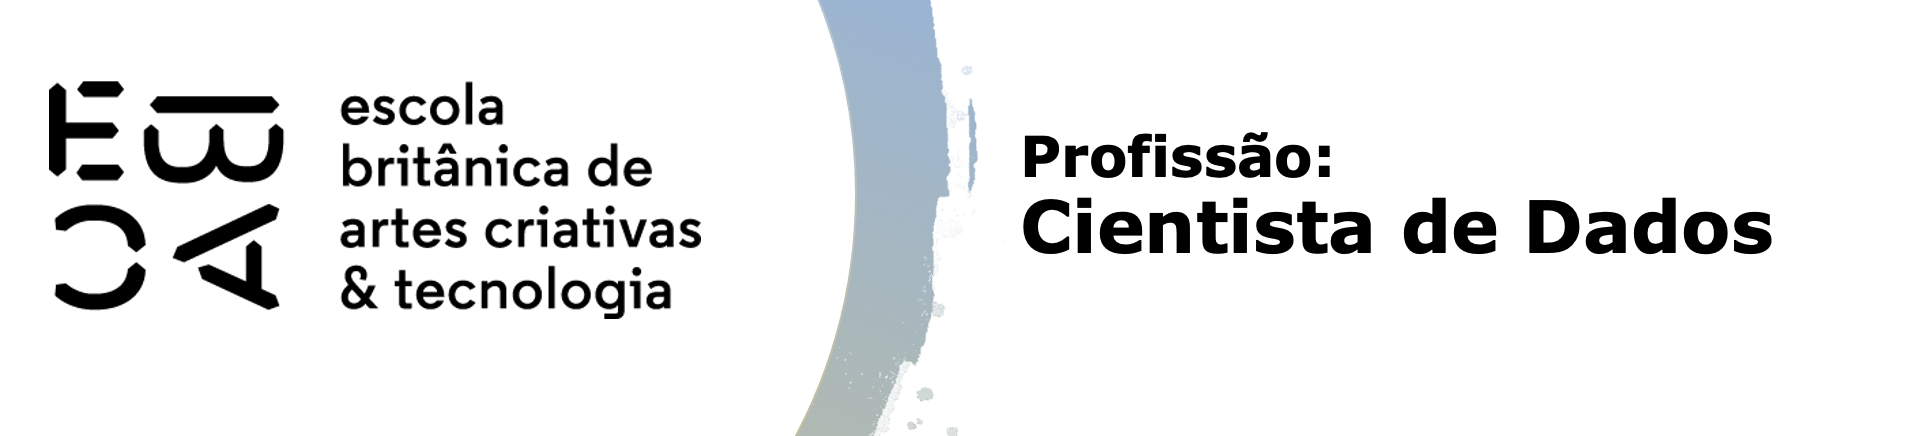

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [29]:
%%time

# 1. Carregar os dados de treinamento
X_train = pd.read_csv(r'C:\Users\Joel\Downloads\Data Scientist\Mod 17\UCI HAR Dataset\X_train_selected.csv')
y_train = pd.read_csv(r'C:\Users\Joel\Downloads\Data Scientist\Mod 17\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt', header=None)

# 2. Carregar os dados de teste
X_test = pd.read_csv(r'C:\Users\Joel\Downloads\Data Scientist\Mod 17\UCI HAR Dataset\X_test_selected.csv')
y_test = pd.read_csv(r'C:\Users\Joel\Downloads\Data Scientist\Mod 17\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt', header=None)

# 3. Visualizar as primeiras linhas dos dados
print("Dados de Treinamento:")
print(X_train.head())
print(y_train.head())

print("\nDados de Teste:")
print(X_test.head())
print(y_test.head())

Dados de Treinamento:
   subject  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
0        1           0.288585          -0.020294          -0.132905
1        1           0.278419          -0.016411          -0.123520
2        1           0.279653          -0.019467          -0.113462
3        1           0.279174          -0.026201          -0.123283
4        1           0.276629          -0.016570          -0.115362
   0
0  5
1  5
2  5
3  5
4  5

Dados de Teste:
   subject  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
0        2           0.257178          -0.023285          -0.014654
1        2           0.286027          -0.013163          -0.119083
2        2           0.275485          -0.026050          -0.118152
3        2           0.270298          -0.032614          -0.117520
4        2           0.274833          -0.027848          -0.129527
   0
0  5
1  5
2  5
3  5
4  5
CPU times: total: 62.5 ms
Wall time: 20.9 ms


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [42]:
# 1. Ajustar um classificador de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train.values.ravel())

# 2. Obter a importância das características
importancia = clf.feature_importances_

# 3. Identificar os índices das 3 melhores variáveis
indices_melhores_variaveis = importancia.argsort()[-3:][::-1]  # 3 melhores

# 4. Exibir os índices e suas importâncias
print("Índices das 3 melhores variáveis:", indices_melhores_variaveis)
print("Importâncias:", importancia[indices_melhores_variaveis])

Índices das 3 melhores variáveis: [1 3 2]
Importâncias: [0.33859454 0.2617045  0.248503  ]


Valores de ccp_alphas:
[0.00000000e+00 6.96674540e-06 1.12766571e-05 2.02554065e-05
 2.72034820e-05 2.84988860e-05 4.63397246e-05 5.35004552e-05
 5.84401136e-05 6.17808017e-05 6.59866112e-05 6.73768888e-05
 7.02851049e-05 7.74168145e-05 7.99585551e-05 8.01474017e-05
 8.28222484e-05 8.29342439e-05 8.49667199e-05 9.21474511e-05
 9.63598696e-05 1.02953015e-04 1.04280015e-04 1.05722623e-04
 1.06211126e-04 1.10109332e-04 1.20580361e-04 1.24186720e-04
 1.32053657e-04 1.35233977e-04 1.36017410e-04 1.41963138e-04
 1.46351627e-04 1.47352194e-04 1.49244166e-04 1.49492770e-04
 1.50482754e-04 1.51968146e-04 1.55713461e-04 1.60511546e-04
 1.60628990e-04 1.64239147e-04 1.67323005e-04 1.74342668e-04
 1.74907961e-04 1.75578030e-04 1.78985873e-04 1.81439304e-04
 1.85996704e-04 1.87333070e-04 1.89065980e-04 1.89796602e-04
 1.96759215e-04 2.01481091e-04 2.01919050e-04 2.02866775e-04
 2.03119333e-04 2.03378413e-04 2.03817707e-04 2.04208078e-04
 2.05459167e-04 2.05888258e-04 2.06087949e-04 2.07617553e-04
 

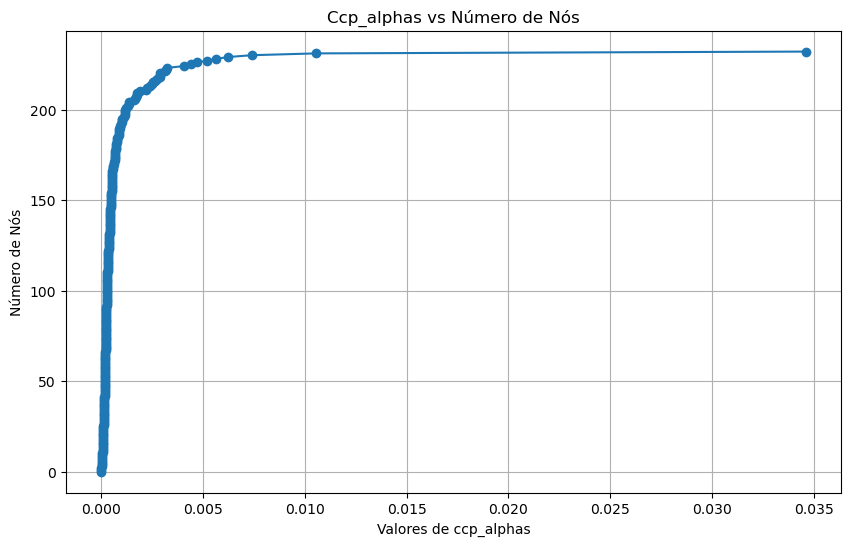

CPU times: total: 188 ms
Wall time: 179 ms


In [50]:
%%time

# Exemplo: supondo que as melhores variáveis sejam as colunas 0, 1 e 2.
melhores_variaveis = [1, 3, 2]  

# Selecionar apenas as melhores variáveis
X_train_best = X_train.iloc[:, melhores_variaveis]
X_test_best = X_test.iloc[:, melhores_variaveis]

# 1. Configurar o classificador
clf = DecisionTreeClassifier(min_samples_leaf=20)

# 2. Ajustar o modelo
clf.fit(X_train_best, y_train)

# 3. Obter os ccps
ccp_alphas = clf.cost_complexity_pruning_path(X_train_best, y_train)
ccp_alphas_values = ccp_alphas.ccp_alphas

# 4. Visualizar os valores de ccp_alphas
print("Valores de ccp_alphas:")
print(ccp_alphas_values)

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_values, range(len(ccp_alphas_values)), marker='o')
plt.title('Ccp_alphas vs Número de Nós')
plt.xlabel('Valores de ccp_alphas')
plt.ylabel('Número de Nós')
plt.grid()
plt.show()

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [46]:
%%time

# Supõe-se que você já tenha os dados carregados e as melhores variáveis identificadas.
melhores_variaveis = [1, 3, 2]  
X_train_best = X_train.iloc[:, melhores_variaveis]
y_train_best = y_train.values.ravel()  # Usar .ravel() para garantir que y seja 1D

# 1. Obter os valores de ccp_alpha
clf = DecisionTreeClassifier(min_samples_leaf=20)
clf.fit(X_train_best, y_train_best)
ccp_alphas = clf.cost_complexity_pruning_path(X_train_best, y_train_best)
ccp_alphas_values = ccp_alphas.ccp_alphas[::10]  # Selecionar 1 a cada 10 valores

# 2. Configurar o GridSearchCV
param_grid = {'ccp_alpha': ccp_alphas_values}
grid_search = GridSearchCV(DecisionTreeClassifier(min_samples_leaf=20), param_grid, cv=10)

# 3. Executar o Grid Search
grid_search.fit(X_train_best, y_train_best)

# 4. Resultados
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("Melhor pontuação:")
print(grid_search.best_score_)

Melhores parâmetros encontrados:
{'ccp_alpha': 0.00048384996698380874}
Melhor pontuação:
0.45674781869269443
CPU times: total: 4.89 s
Wall time: 4.91 s


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Acurácia na base de testes: 0.4398


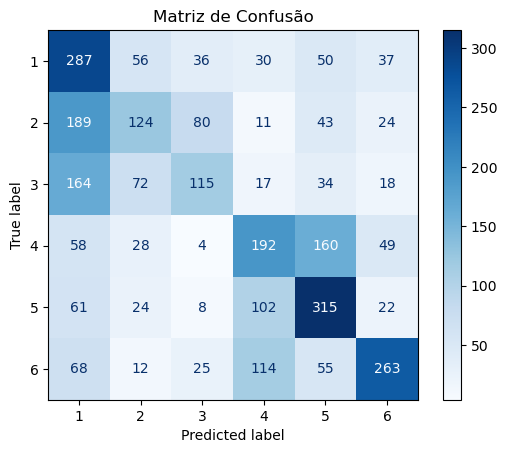

In [56]:
X_train_best = X_train.iloc[:, indices_melhores_variaveis]
X_test_best = X_test.iloc[:, indices_melhores_variaveis]
y_train_best = y_train.values.ravel()
y_test_best = y_test.values.ravel()

# 1. Treinar o modelo com os melhores parâmetros encontrados
best_ccp_alpha = grid_search.best_params_['ccp_alpha']
clf_best = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=best_ccp_alpha)
clf_best.fit(X_train_best, y_train_best)

# 2. Fazer previsões na base de teste
y_pred = clf_best.predict(X_test_best)

# 3. Calcular a acurácia
acuracia = accuracy_score(y_test_best, y_pred)
print(f"Acurácia na base de testes: {acuracia:.4f}")

# 4. Calcular e visualizar a matriz de confusão
cm = confusion_matrix(y_test_best, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_best.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

Acurácia da árvore simples: 0.8317
Índices das 3 variáveis mais importantes: [1 2 3]
Importâncias: [0.72466196 0.15318938 0.11446304]
Acurácia com as 3 melhores variáveis: 0.8317


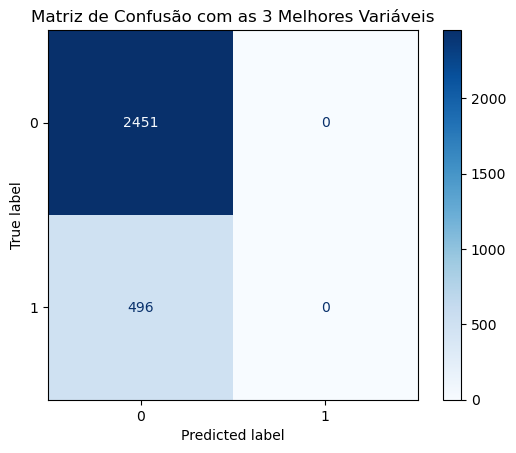

In [58]:
# Exemplo: considerar a classe 1 (ou outra de maior erro) como a classe alvo para a variável binária
y_train_binary = (y_train.values.ravel() == 1).astype(int)  # Classe 1 como exemplo
y_test_binary = (y_test.values.ravel() == 1).astype(int)

# 1. Ajustar uma árvore de decisão simples
clf_simple = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clf_simple.fit(X_train, y_train_binary)

# 2. Fazer previsões na base de teste
y_pred_simple = clf_simple.predict(X_test)

# 3. Calcular a acurácia
acuracia_simple = accuracy_score(y_test_binary, y_pred_simple)
print(f"Acurácia da árvore simples: {acuracia_simple:.4f}")

# 4. Obter a importância das variáveis
importancia_variaveis = clf_simple.feature_importances_

# 5. Identificar os índices das 3 variáveis mais importantes
indices_melhores_variaveis = importancia_variaveis.argsort()[-3:][::-1]

# 6. Exibir as 3 variáveis mais importantes
print("Índices das 3 variáveis mais importantes:", indices_melhores_variaveis)
print("Importâncias:", importancia_variaveis[indices_melhores_variaveis])

# 7. Criar um novo conjunto de dados com as 3 variáveis importantes
X_train_best = X_train.iloc[:, indices_melhores_variaveis]
X_test_best = X_test.iloc[:, indices_melhores_variaveis]

# 8. Treinar um novo modelo com as 3 melhores variáveis
clf_best = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clf_best.fit(X_train_best, y_train_binary)

# 9. Fazer previsões na base de teste
y_pred_best = clf_best.predict(X_test_best)

# 10. Calcular a nova acurácia
acuracia_best = accuracy_score(y_test_binary, y_pred_best)
print(f"Acurácia com as 3 melhores variáveis: {acuracia_best:.4f}")

# 11. Matriz de Confusão
cm_best = confusion_matrix(y_test_binary, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão com as 3 Melhores Variáveis')
plt.show()